<a href="https://colab.research.google.com/github/LotaSchwager/ADA-Informes/blob/main/InformeKruskal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Kruskal

## 1. Descripción del problema

El problema del árbol recubridor mínimo se trata de **conectar un grupo de objetos de la manera más económica posible**. Los objetos y las conexiones podrían representar algo físico, como ciudades y la distancias entre ellas.

Los objetos y las conexiones entre ellas se representan de manera más común con grafos. Un grafo $G = (V,E)$ tiene dos variables:

* Un conjunto $V$ de vértices
* Un conjunto $E$ de aristas

**Para este problema solo consideraremos grafos no dirigidos**, en los que cada artista $e$ es un par desordenado {${v,w}$} de vértices (escritos como $e =(v.w)$ o $e =(w,v)$) que se denominan extremos de la arista. Los números |$V$| y |$E$| de vértices y aristas generalmente se denotan por $n$ y $m$ respectivamente.

### Árbol Recubridor

La entrada en el problema delo arbol recubridor es un grafo no dirigido $G(V,E)$ en que cada arista $e$ tiene un costo real $C_e$. El objetivo es calcular un arbol recubridor del grafo con la suma minima posible de costos de las aristas.

Por arbol recubridor $G$ nos referimos a un subconjunto $T$⊆$E$ de aristas que satisface dos propiedades:

1. $T$ no debe contener un ciclo (esta es la parte de "arbol")
2. Para todo par $v,w$ ∈ $V$ de vertices, $T$ debe incluir un camino entre $v$→$w$ (esta es la parte "recubridor")

**Problema: del árbol recubridor mínimo**

**Entrada**: Un grafo conectado no dirigido $G=(V,E)$ y un costo real $C_e$ para cada arista $e$ ∈ $E$.

**Salida**: Un árbol recubridor $T$ ⊆ $E$ de $G$ con la suma mínima posible $∑\limits_{e \in T}C_e$ de costos de aristas.

## 2. Descripción del algoritmo

El algoritmo de Kruskal como el algoritmo de Prim, construye de manera greedy un árbol de recubridor, una arista a la vez, este algoritmo puede hacer crecer varios árboles en paralelo, contenido para que se fusionen solamente al final del algoritmo.

El algoritmo de Kruskal es libre de elegir la arista restante más barato en todo el grafo, aunque con una sola condición, los ciclos están prohibidos, Así que se elige la arista más barata que no crea un ciclo.

#### Ejemplo del Algoritmo de Kruskal

Para explicar de mejor manera el algoritmo daremos un ejemplo general de lo que hace.

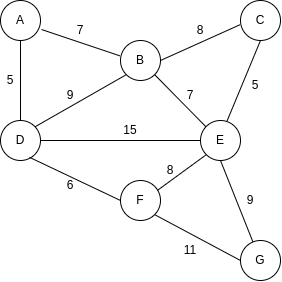



Este es el grafo inicial. Para empezar buscaremos la arista con el mínimo valor, en este caso son 2 por lo que tomaremos uno de manera arbitraria, eligiendo el arista AD como arista de inicio.

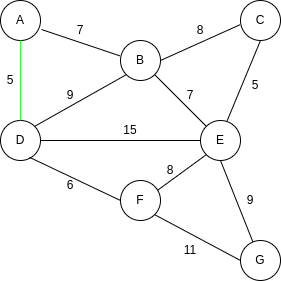

Se selecciona la siguiente arista de menor valor que no forme ciclo que en este caso es CE.

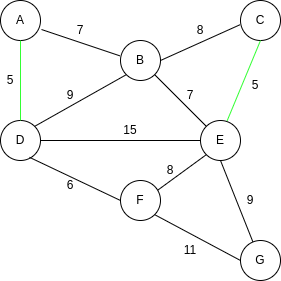

Seleccionaremos la arista DF que es el siguiente arista de menor valor que no forma ciclos.

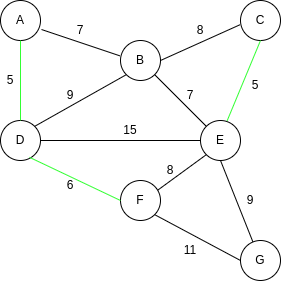

De las aristas restantes, las de menor peso son las aristas AB y BE de valor 7, se elige arbitrariamente y se añade al conjunto de aristas elegidas. De este modo, la arista DB no puede ser seleccionada, ya que forma un ciclo.

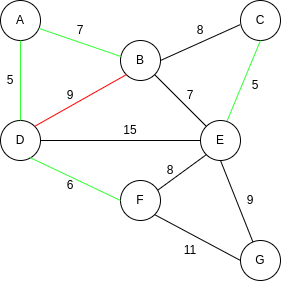

Siguiendo el proceso seleccionaremos la arista BE con valor 7 y con eso las aristas BC, DE y FE formarán ciclos, por lo que no se podrán seleccionar.

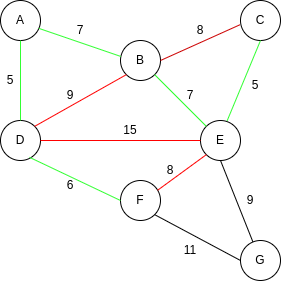

Por último, se selecciona la arista EG. Como hemos visitado todos los nodos y tenemos tantas aristas como nodos menores uno, el proceso termino.

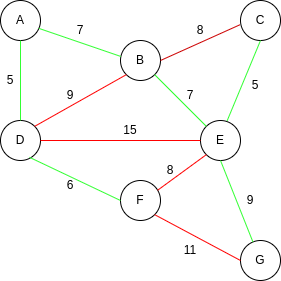

Por lo que el árbol recubridor tendrá estos nodos y aristas

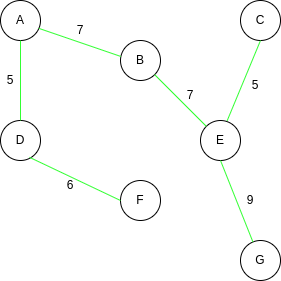

El valor del árbol se calcula sumando cada arista:

$$Valor = 5+7+6+5+9+7 = 39$$

Por lo que podemos decir que la suma mínima de los costos del grafo presentado es 39.

### La estructura de datos Union-Find
Cada iteración del algoritmo de Kruskal realiza una verificación de ciclo
agregando una arista ($v, w$) a la solución hasta ahora $T$ crea un ciclo si y solo si $T$ ya contiene un camino $v,w$.

La razón de ser de la estructura de datos union-find es mantener la partición de un conjunto de objetos. Cada objeto está en su propio conjunto. Estos conjuntos pueden unirse con el tiempo pero nunca dividirse.

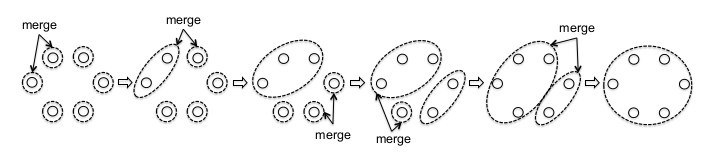



Verificar si $T$ ya contiene una ruta $v,w$ se reduce a verificar si $v$ y $w$ pertenecen al mismo conjunto de la particion (es decir, al mismo componente conectado). La estructura de datos union-find admite dos operaciones para acceder y modificar su particion, las operaciones Union y Find.

#### Union-Find: Operaciones

* **Inicializar**: Dado un arreglo $X$ de objetos, cree una estructura de datos union-find con cada objeto $x$ ∈ $X$ en su propio conjunto.

* **Find**: Dada una estructura de datos union-find y un objeto $x$ en ella, retorna el nombre del conjunto que contiene $x$.

* **Union**: Dada una estructura de datos union-find y dos objetos $x,y$ ∈ $X$, combine los conjuntos que contienen $x$ e $y$ en una particion $A$. Esta particion de un conjunto $X$ de objetos es una forma de agruparlos en uno o más grupos, como si fuera una colección de subconjuntos no vacíos de $X$ tal que cada objeto $x$ ∈ $X$ también pertenezca a uno de los subconjuntos.

#### Tiempo de ejecución de las operaciones de Union-Find

En una estructura de datos union-find con $n$ objetos, el "**Inicializar**", "**Find**" y "**Union**" tienen tiempo de ejecución de $O(n)$, $O(logn)$ y $O(logn)$ respectivamente.

<table>
  <tr>
    <th>Operación</th>
    <th>Inicializar</th>
    <th>Find</th>
    <th>Union</th>
  </tr>
  <tr>
    <td>Complejidad</td>
    <td>  $O(n)$   </td>
    <td>  $O$(log$n$)  </td>
    <td>  $O$(log$n$)  </td>
  </tr>
</table>

#### Pseudocodigo de Kruskal con Union-Find

```
// v Objeto v            || v conexiones entre los objetos v
// V --> nodos o vertice || E --> arcos o arista

//(v,w) --> son 2 nodos
Funcion kruskalUnionFind (Grafo):
      
      //Variable que representa el arbol recubridor y guarda los nodos
      T = ∅ 

      //La iniciacion del Union-Find
      U = initialize(V)

      // Ordena los arcos de los nodos por coste usando un algoritmo de      
      // ordenamiento ej : MergeSort

      //Loop principal
      Para cada (v , w) ∈ E en orden creciente del coste:
          
          Si Find(U,v) != Find(U,w) entonces:
              
              //no hay ruta v-w en T asique esta bien agregarlo
              T = T ∪ {(v,w)}

              //Se actualiza debido a la union de los objetos
              Union(U, v, w)

      retorna T        
```
Viendo como se comporta el pseudocódigo vemos que Kruskal con Union-Find hace lo siguiente:

+ Inicializar variables:

> + Conjunto $T$ que guardara los objetos o nodos (este mismo conjunto    
    sera el que retornaremos alfinal del algoritmo)
    
> + Conjunto del Union-Find para todo objeto del grafo entrante

+ Ordenar los arcos por valor o peso de menor a mayor con un algoritmo de 
  ordenamiento como MergeSort u otro similar

+ Para cada par de nodos (v,w) existe un arco que las conecte:

>+ Si entre los nodos v y w no existe una conexión previa, lo que hace find es retornar la raíz a la cual está sujeto el nodo, si 2 nodos tiene al mismo nodo raíz significa que unirlos crearía un ciclo y eso es lo que se quiere evitar:
               
>>+ T agrega a su conjunto esta conexion entre v y w
>>+ Unir los conjuntos v y w para que asi se sepa que existe una 
    conexion entre ellas

#### Ejemplo de Kruskal con Union-Find

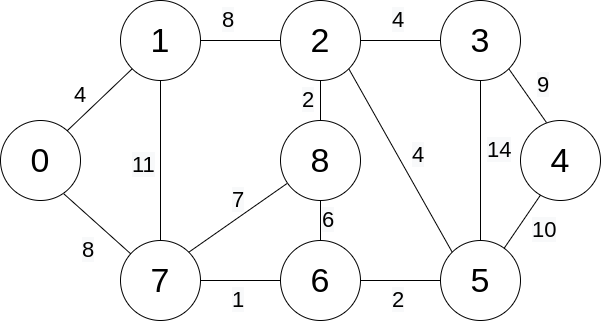

1.Inicializamos cada nodo como un Union-Find

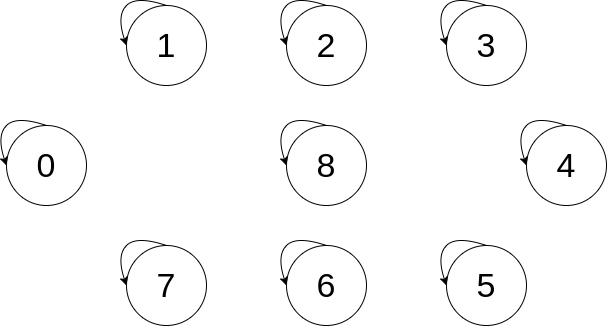

Como ordenamos los arcos por tamaños de menor a mayor, el primer arco es de valor 1 entre los nodos 7 y 6, con la operación find(6) y find(7) vemos que estos dos nodos no tienen la misma raíz por lo que usamos la operación Union (7,6).

$T = {(7-6)}$

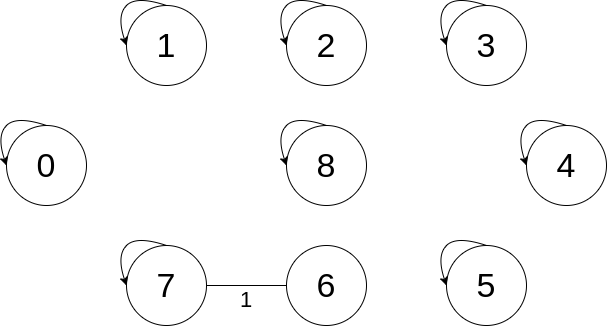

Ahora tomamos el arco de valor 2 entre los nodos 2 y 8, de nuevo como find(2) y find(8) son disintos, ya que los dos nodos tienen distinta raíz, utilizamos la operación Union(2,8).

$T = (7-6),(2-8)$

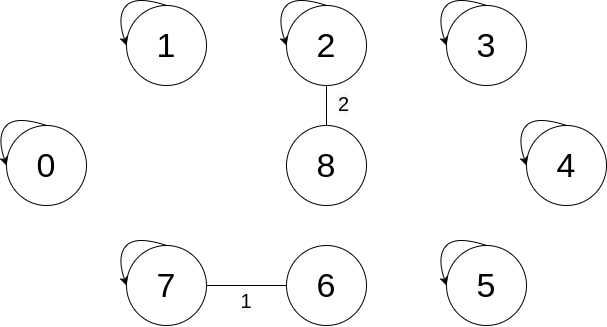

Ahora tomamos el arco de valor 2 pero de los nodos 6 y 5. Con find(6) y find(5) vemos que tienen raices distintas asique los unimos con Union(6,5)

$T = (7-6),(2-8),(6-5)$

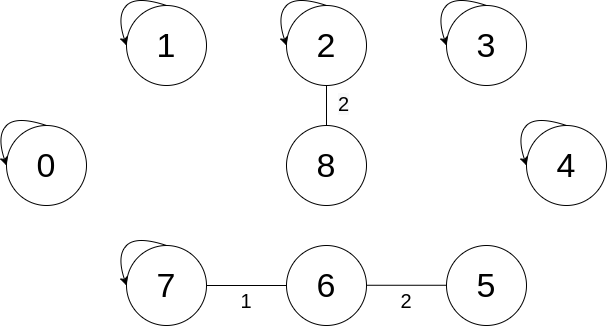

Ahora se toma el arco de valor 4 entre los nodos 0 y 1. find(0) != find(1) por lo que usamos Union(0,1).

Después Tomamos el otro arco de valor 4 que ahora es entre los nodos 2 y 5, también con distintos find y otra vez utilizamos la operación Union(2,5).

$T = (7-6),(2-8),(6-5),(2-5)$

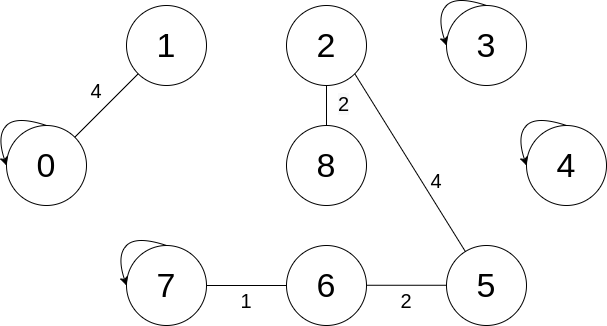

Ahora se toma el arco de valor 6 entre los nodos 8 y 6, pero resulta que el find(6) y find(8) son igual, ya que los 2 tienen la misma raíz por lo que se descarta.

Después se toma el arco de valor 7 entre los nodos 7 y 8, pero pasa los mismos que el anterior, por lo que se vuelve a descartar.

El siguiente arco se puede tomar y ese es el otro de valor 7 entre los nodos 2 y 3 ambos con distinto find por lo que llamamos a Union(2,3).

Tomamos el siguiente arco de valor 8 entre los nodos 0 y 7 ambos con distinta raíz por lo que llamamos a Union(0,7).

$T = (7-6),(2-8),(6-5),(2-5),(2-3),(0-7)$

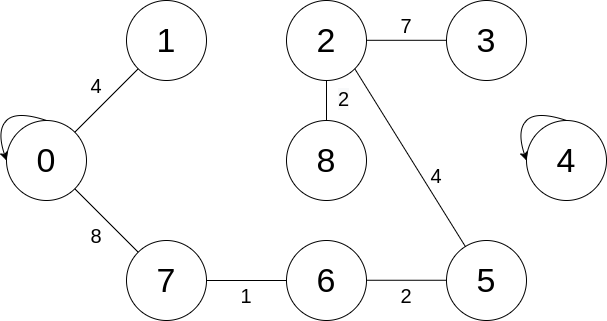

Se toma el arco de valor 8 entre los nodos 1 y 2, pero estos son parte de la misma raíz por lo que se descarta.

El siguiente es el arco de valor 9 entre los nodos 3 y 4 sus valores de find son distintas por lo que la unimos con la operación Union(3,4).

$T = (7-6),(2-8),(6-5),(2-5),(2-3),(0-7),(3-4)$.

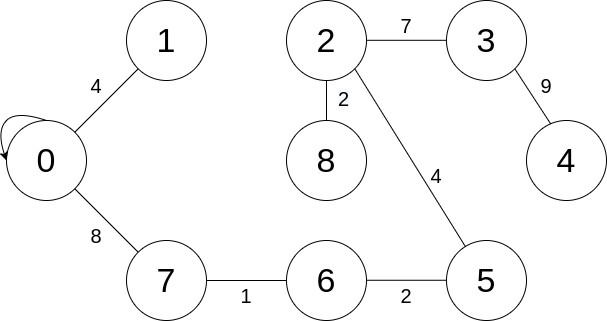

Aun cuando nos quedan arcos por revisar hemos incluido una cantidad de arcos equivalentes a $nodos - 1$ por lo que el algoritmo termina aquí.

Nuestro conjunto $T$ finaliza con los siguientes valores:

$T = (7-6),(2-8),(6-5),(2-5),(2-3),(0-7),(3-4)$.

y el coste minimo posible es:

Costo Minimo $= 4 + 8 +1 + 2 + 4 + 2 + 7 + 9 = 37$

## 3. Implementacion en Python

Implementacion del algoritmo de Kruskal con Union-Find en python.

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

class Grafardo:

    def __init__(self, vertices):
        self.V = vertices #Numero de vertices
        self.grafinho = []#Grafo de la clase
        self.GrafoResultado = nx.Graph()#Grafo resultado para mostrar
        self.grafardo = nx.Graph()#Grafo entrante para mostrar
        self.verticeH = [] #Nodos iniciales del grafo resultado
        self.verticeA = []#Nodos finales del grafo resultado
        self.peso = [] #Peso de los arcos del grafo resutlado
        self.posicion = 0#Posicion para recorrer los 3 anteriores array
        self.verbose = False
        self.visualise = False

    #Funcion que agrega arcos al grafo
    def addArco(self, u, v ,w):
        self.grafinho.append([u,v,w])
        self.grafardo.add_edge(u, v,  weight = w)
    
    #Operacion find descrito anteriormente
    def find(self, parent, i, verbose):

        if verbose:
            print("\n----------------------------Operacion Find----------------------------")
        
        #Si la raiz de i no es si misma, usara find en parent[i]
        if parent[i] != i:
            if verbose:
                print("Como parent[",i,"] !=", i, ".Se vuelve a usar find pero esta vez con parent[",i,"]")

            parent[i] = self.find(parent, parent[i], verbose)
        
        if verbose:
            print("Una vez que parent[",i,"] ==",i," Entonces se retorna parent[",i,"] =", parent[i])
            print("----------------------------Fin Operacion Find----------------------------\n")
        #retornara la raíz de i
        return parent[i] 

    #Funcion Union descrito anteriormente

    def union(self, parent, rango, x, y, verbose):
        
        if verbose:
            print("\n----------------------------Operacion Union----------------------------")
            print("Este se hace por rango por lo que el que tenga el mayor rango sera la raíz\n")

        #Aqui la union se hace por rango
        #Osea el que tenga el rango mas alto sera la raíz
        if rango[x] < rango[y]:
            if verbose:
                print("\nComo el rango[",x,"] < rango[",y,"], entonces parent[",x,"] =",y)
                print("----------------------------Fin Operacion Union----------------------------\n")
            parent[x] = y

        elif rango[x] > rango[y]:
            if verbose:
                print("\nComo el rango[",x,"] > rango[",y,"], entonces parent[",y,"] =",x)
                print("----------------------------Fin Operacion Union----------------------------\n")
            parent[y] = x

        else:
            #Si los rangos son iguales
            #Cualquiera se puede hacer raíz y habra que sumar +1 al rango
            if verbose:
                print("\nSi los 2 rangos son iguales entonces parent[",y,"] =",x,"y al rango[",x,"] se le suma + 1")
                print("----------------------------Fin Operacion Union----------------------------\n")
            parent[y] = x
            rango[x] += 1
    
    #Funcion para constuir el MST usando kruskal con Union-Find
    def kruskalUnionFind(self):

        if self.visualise:
            print("Grafo entrante:")
            self.muestrameAntes()

        if self.verbose:
            print("Primero Creamos nuestra matriz con los resultados, esta las guardara en nodo ida, nodo llegada, peso del arco", end ='\n')
            print("T = []", end = '\n\n')
            print("Variable usara para tomar los valores de los arcos en orden menor a mayor", end = '\n')
            print("i = 0", end = '\n\n')
            print ("Varibale usada para contar los arcos", end = '\n')
            print("e = 0", end = '\n\n')
        #Conjunto T de resultados
        T = []

        #Variable usada para ordenar los arcos
        i = 0

        #Variable usada para T[]
        e = 0

        #Ahora hay que ordenar los arcos de menor a mayor 
        #respecto a su peso/valor
        if self.verbose:
            print("Grafo entrante : ", str(self.grafinho))

        self.grafinho = sorted(self.grafinho,key=lambda item: item[2])
        
        if self.verbose:
            print("Grafo ordenado respecto al arco: ", str(self.grafinho), end = '\n\n')
            print("Aqui guardaremos las raices de cada nodo", end = '\n')
            print("parent = []", end = '\n\n')
            print("Aqui guardaremos el rango de cada nodo", end = '\n')
            print("rango = []", end = '\n\n')

    
        #Aqui guardaremos la raiz de cada nodo
        parent = []

        #Aqui guardaremos el rango de cada nodo
        rango = []

        #Creamos N subconjuntos con un unico elemento, siendo N la cantidad de nodos
        for nodo in range(self.V):
            parent.append(nodo)
            rango.append(0)
        
        if self.verbose:
            print("Rellenamos parent con raices a si mimas de cada nodo y rango todas en 0")
            print("parent = ", str(parent))
            print("rango = ", str(rango))
        #Loop principal, esto se iterara hasta que se hayan agregado 
        #tantos arcos como nodos - 1 haya
        while e < self.V - 1:

            #Tomaremos el arco mas pequeño
            u,v,w = self.grafinho[i]
            i += 1

            if self.verbose:
                print("\n----------------------------Inicio Iteracion----------------------------\n")
                print("Se selecciona el arco de peso :", w, "que contiene los nodos",u,"y", v)
                print("Si find(",u,") es distinto de find(",v,")")
            
            #Utilizamos la operacion find para saber si tienen distinta raíz
            x = self.find(parent, u, self.verbose)
            y = self.find(parent, v, self.verbose)
            
            #Si sus raices son distintas entrara al if
            #Si sus raices son iguales se descarta
            if x != y:
                e += 1
                
                
                if self.verbose:
                    print("Como son distintos se hace lo siguiente:\n")
                    print("Se agrega al T los nodos u,v mas el peso del arco w")
                    print("T = ", str(T))
                
				#Se agrega los nodos al resultado y despues se unen con Union
                T.append([u,v,w])
                if self.visualise:
                    self.verticeH.append(u)
                    self.verticeA.append(v)
                    self.peso.append(w)
                    self.agregarArcos(self.posicion)
                    self.posicion += 1
                
                if self.verbose:
                    print("Ahora se ocupa la operacion Union para unir los 2 nodos")

                self.union(parent, rango, x, y, self.verbose)

            if self.verbose and x==y:
                print("Ya que son iguales se descarta este arco con los nodos")

            if self.verbose:
                print("----------------------------Fin Iteracion----------------------------\n")        
        
        if self.verbose:
            print("Fin del algoritmo\n")

        if self.visualise:
            print("\nGrafo con el minimo coste posible:")
            self.muestrameESTA()    

        return T
    
    #Funcion para agregar al grafo de salida que despues se mostrara con visualise
    def agregarArcos(self, i):
        self.GrafoResultado.add_edge(self.verticeH[i], self.verticeA[i],  weight=self.peso[i])
  
    #Funcino para mostrar al grafo que sale del algoritmo de kruskal
    def muestrameESTA(self):
        pos = nx.shell_layout(self.GrafoResultado)
        labels = nx.get_edge_attributes(self.GrafoResultado, 'weight')
        nx.draw_networkx_nodes(self.GrafoResultado, pos, node_size=700)
        nx.draw_networkx_edges(self.GrafoResultado, pos, width=4)
        nx.draw_networkx_labels(self.GrafoResultado, pos, font_size=20, font_family='sans-serif')
        labels = nx.get_edge_attributes(self.GrafoResultado, 'weight')
        nx.draw_networkx_edge_labels(self.GrafoResultado, pos, edge_labels=labels)
        plt.axis('off')
        plt.show()
    
    #Funcion que muestra al grafo entrante
    def muestrameAntes(self):
        pos = nx.shell_layout(self.grafardo)
        labels = nx.get_edge_attributes(self.grafardo, 'weight')
        nx.draw_networkx_nodes(self.grafardo, pos, node_size=700)
        nx.draw_networkx_edges(self.grafardo, pos, width=4)
        nx.draw_networkx_labels(self.grafardo, pos, font_size=20, font_family='sans-serif')
        labels = nx.get_edge_attributes(self.grafardo, 'weight')
        nx.draw_networkx_edge_labels(self.grafardo, pos, edge_labels=labels)
        plt.axis('off')
        plt.show()
    
    #Funcion para poner a verbose en true o false
    def trueVerbose(self):
        if self.verbose:
            self.verbose = False
        else:
            self.verbose = True
    
    #Funcion para poner a visualise en true o false
    def trueVisualise(self):
        if self.visualise:
            self.visualise = False
        else:
            self.visualise = True

    def grafoEntrante(self, grafo):
        self.grafinho = grafo        


g = Grafardo(4)
g.addArco(0, 1, 10)
g.addArco(0, 2, 6)
g.addArco(0, 3, 5)
g.addArco(1, 3, 15)
g.addArco(2, 3, 4)

# Funcion llamada
r = g.kruskalUnionFind()

minimCost = 0
for u,v,valor in r:
    minimCost += valor
    print("Nodos : %d --- %d  :: el valor del arco es %d" % (u,v,valor), end = "\n")

print ("Coste minimo del arbol de recursion :", minimCost)

Nodos : 2 --- 3  :: el valor del arco es 4
Nodos : 0 --- 3  :: el valor del arco es 5
Nodos : 0 --- 1  :: el valor del arco es 10
Coste minimo del arbol de recursion : 19


### 3.1 Implementacion con Verbose

In [ ]:
G = Grafardo(9)
G.addArco(0, 1, 4)
G.addArco(0, 7, 8)
G.addArco(7, 1, 11)
G.addArco(7, 6, 1)
G.addArco(1, 2, 8)
G.addArco(2, 8, 2)
G.addArco(8, 6, 6)
G.addArco(7, 8, 7)
G.addArco(2, 3, 7)
G.addArco(6, 5, 2)
G.addArco(5, 2, 4)
G.addArco(4, 3, 9)
G.addArco(5, 3, 14)
G.addArco(1, 3, 15)
G.addArco(5, 4, 10)

G.trueVerbose()
resultado = G.kruskalUnionFind()

minimCost = 0
for u,v,valor in resultado:
    minimCost += valor
    print("Nodos : %d --- %d  :: el valor del arco es %d" % (u,v,valor), end = "\n")

print ("Coste minimo del arbol de recursion :", minimCost)

Primero Creamos nuestra matriz con los resultados, esta las guardara en nodo ida, nodo llegada, peso del arco
T = []

Variable usara para tomar los valores de los arcos en orden menor a mayor
i = 0

Varibale usada para contar los arcos
e = 0

Grafo entrante :  [[0, 1, 4], [0, 7, 8], [7, 1, 11], [7, 6, 1], [1, 2, 8], [2, 8, 2], [8, 6, 6], [7, 8, 7], [2, 3, 7], [6, 5, 2], [5, 2, 4], [4, 3, 9], [5, 3, 14], [1, 3, 15], [5, 4, 10]]
Grafo ordenado respecto al arco:  [[7, 6, 1], [2, 8, 2], [6, 5, 2], [0, 1, 4], [5, 2, 4], [8, 6, 6], [7, 8, 7], [2, 3, 7], [0, 7, 8], [1, 2, 8], [4, 3, 9], [5, 4, 10], [7, 1, 11], [5, 3, 14], [1, 3, 15]]

Aqui guardaremos las raices de cada nodo
parent = []

Aqui guardaremos el rango de cada nodo
rango = []

Rellenamos parent con raices a si mimas de cada nodo y rango todas en 0
parent =  [0, 1, 2, 3, 4, 5, 6, 7, 8]
rango =  [0, 0, 0, 0, 0, 0, 0, 0, 0]

----------------------------Inicio Iteracion----------------------------

Se selecciona el arco de peso : 1 que

### 3.2 Implementacion con Visualise

Grafo entrante:


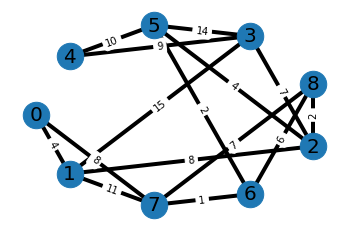


Grafo con el minimo coste posible:


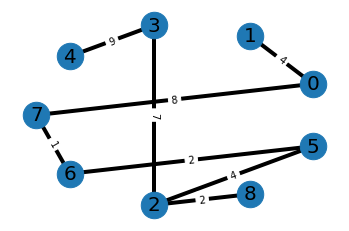

[[7, 6, 1],
 [2, 8, 2],
 [6, 5, 2],
 [0, 1, 4],
 [5, 2, 4],
 [2, 3, 7],
 [0, 7, 8],
 [4, 3, 9]]

In [19]:
C = Grafardo(9)
C.addArco(0, 1, 4)
C.addArco(0, 7, 8)
C.addArco(7, 1, 11)
C.addArco(7, 6, 1)
C.addArco(1, 2, 8)
C.addArco(2, 8, 2)
C.addArco(8, 6, 6)
C.addArco(7, 8, 7)
C.addArco(2, 3, 7)
C.addArco(6, 5, 2)
C.addArco(5, 2, 4)
C.addArco(4, 3, 9)
C.addArco(5, 3, 14)
C.addArco(1, 3, 15)
C.addArco(5, 4, 10)

C.trueVisualise()
C.kruskalUnionFind()

## 4. Correctitud

### Teorema 1(Correctitud del algoritmo de Kruskal usando Union-Find)
El algoritmo de Kruskal se encarga de generar un árbol recubridor $T$ que contiene la mínima suma posible de arcos donde estén todos los nodos presentes con un grafo $G$ de entrada.

#### Lema 1 (propiedad de bucle invariante del algoritmo de Kruskal usando Union-Find)
Al comienzo de cada iteración del bucle más grande, el grafo resultante $T$ contiene los nodos del grafo entrante, pero no formando ciclos y utilizando los arcos con menor valor.

### **Prueba del Lema 1.**
Para probar que la propiedad es verdadera, debemos probar que:

- Es verdadera antes de la primera iteración (**inicialización**)
- Si es verdadera antes de una iteración, lo sigue siendo después de la iteración (**mantención**)
- Asumiremos que las tres operaciones del Union-Find están bien implementadas.

**Inicialización**: Notamos que el primer arco $e$ seleccionado es el que contiene el valor más bajo (porque antes de la iteración se ordenó del arco menor al arco mayor), debido a que es el primer arco seleccionado, los dos nodos que contiene ese arco se unen por la operación Unión obteniendo nuestra primera conexión para el árbol recubridor final.

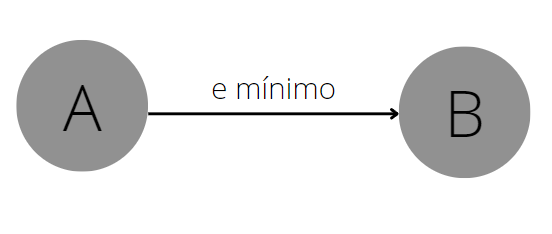

**Mantención**: Para probar la mantención, debemos observar lo que ocurre durante la i-ésima iteración. Asumimos antes de entrar a la iteracion que el arbol recubridor no contiene ningun ciclo.

Durante la iteracion se selecciona el i-ésimo arco $e_{i-ésima}$, los dos nodos que contiene este arco se le buscan sus raices con la operacion Find por lo que ocurren dos posibilidades:

+ Si find($nodo_1$) es distinto de find($nodo_2$) significa que no están en un mismo conjunto, por lo que no habrá ciclo si se unen por lo que se agrega esta estos nodos y arco $e_{i-ésima}$ al árbol recubridor y se utiliza la operación Union para unir los conjuntos de los dos nodos a una misma raíz. Después de agregar el arco y sus nodos al árbol recubridor y unirlos se sigue al siguiente arco $e_{i-ésimo + 1}$.

+ Si find($nodo_1$) es igual que find($nodo_2$) no se agregan al árbol recubridor, por lo que no se utiliza la operación Union porque al tener la misma raíz significa que unirlos provocara un ciclo, por esto este arco se descarta y se sigue al siguiente arco $e_{i-ésimo + 1}$.

El algoritmo terminará la iteración cuando haya tantos arcos como nodos - 1, significando que están todos los nodos del grafo entrante en el árbol recubridor.

Como en cada iteración empezamos desde el arco más pequeño hasta el más grande, nos podemos asegurar que los arcos con el menor coste tendrán prioridad al momento de crear este árbol recubridor, también la implementación de las operaciones de Find y Union que nos ayudan a encontrar la raíz de cualquier nodo y la otra al crear una relación entre dos nodos donde ahora tendrán una raíz en común, gracias a estas operaciones podemos evitar la creación de ciclos dentro del árbol recubridor.

Con esto podemos asegurar que el algoritmo de kruskal con Union-Find genera un árbol recubridor sin ciclos usando todos los nodos del grafo de entrada y con el menor costo posible, por lo que este algoritmo es correcto por la propiedad invariante de bucle.

## 5. Tiempo de ejecución

Para ver el tiempo de ejecución del Algoritmo de Kraskal primero veremos el tiempo de ejecución de las operaciones del Union-Find que describimos anteriormente. Si bien antes mostramos sus tiempos de ejecución, ahora justificaremos del porqué tienen ese tiempo de ejecución.

### 5.1 **Tiempo de ejecución de las operaciones Union-Find**

#### **Operación Inicializar**:
Como describimos anteriormente, dado un conjunto de $n$ objetos, inicializar creara una estructura de datos union-find con cada objeto del conjunto de entrada. Por lo que tenemos lo siguiente:

+ Para cada $i = 1,2,3.....,n$, inicializar crea un $U(i)$ para $i$

Por lo que la operación claramente tiene complejidad $O(n)$, debido a que recorre los $n$ objetos del conjunto de entrada.

También hay que tener en cuenta que $n$ es la cantidad de objetos, por lo que Inicializar dependerá de la cantidad de nodos u objetos del conjunto de entrada, no de las aristas o arcos.

#### **Operación Find**:
En la operación find, iremos recorreremos un conjunto union-find hasta encontrar su raíz y retornar el nodo raíz.

+ Empezando de una posición $x$ de un array, repetidamente atravesar los arcos hasta llegar a una posición $j$ con $U(j) = j$.

+ Retorna $j$

Para saber cuanto tiene que recorrer find hasta encontrar la raíz tenemos que definir la profundidad de un nodo $x$ como el número de recorridos que realiza la operación Find desde $x$.

Cuando $v$ y $w$ no están unidos a un conjunto más grande, o sea tanto $v$ como $w$ son sus propios raíces el tiempo de ejecución seria $O(1)$, este seria el mejor caso.

Entonces el tiempo de ejecución en el peor de los casos es correspondiente a la mayor profundidad de un nodo-equivalente, a la mayor altura del árbol en el grafo de entrada. Quien tiene la responsabilidad de crear ese arbol es Union ya que dependiendo de como se implemente esta operacion afectara en el tiempo de ejecucion de find.

Por ejemplo podríamos tener el siguiente caso:

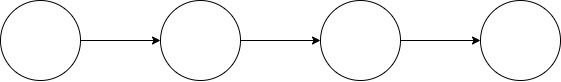

Para este caso Find tendría tiempo de ejecución $O(n)$, este se podría considerar el peor caso.

Aquí hay otro caso posible:

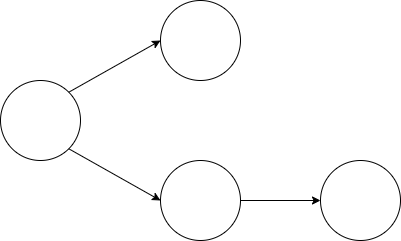

Para este caso Find tendría tiempo de ejecución $O(logn)$

Por lo que tenemos que tener en cuenta de Find es que en cuanto a tiempo de ejecución depende de Union y de la cantidad de nodos, en cuanto a union se implementa de tal manera que el tiempo de ejecución en caso promedio es el del $O(logn)$.

#### **Operación Union**:
Para la operación Union tenemos dos objetos o nodos $x$ e $y$, pertenecientes a dos árboles $T_1$ y $T_2$ del grafo de entrada que los contiene, deben combinarse en un solo árbol. Hay varias maneras de combinar dos árboles por ejemplo:

Ejemplo 1:

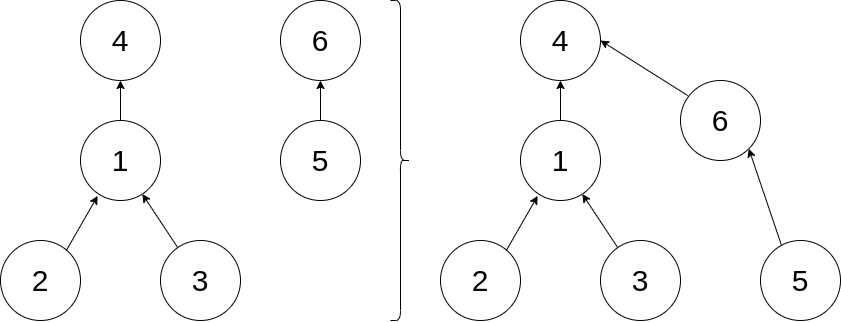

Ejemplo 2:

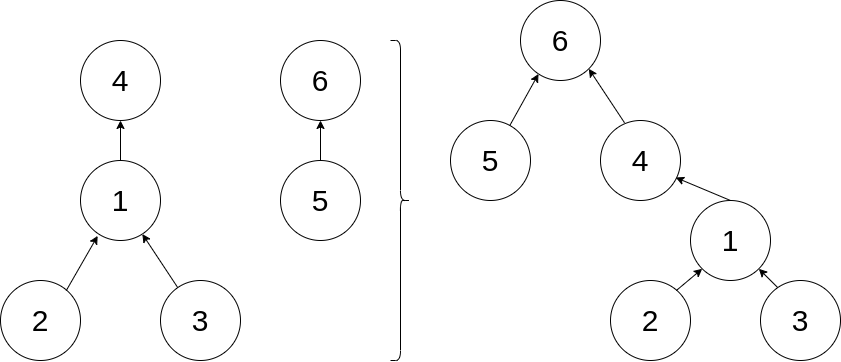

Por lo que tenemos que tomar la decisión de como unir estos dos árboles y es por eso que haremos la union por rango que siempre une el árbol con altura más baja a la raíz del árbol con altura más alta, o sea que en este caso se haría el ejemplo 2, ya que $T_1$ tiene mayor altura que $T_2$.

Para implementar la union por rango, cada nodo se asociará a un rango. Inicialmente, todos los nodos tendrán a sí mismos como árbol, por lo que su rango será cero.

Los casos para unir dos árboles será:

+ Si ambos árboles tiene el mismo rango: el rango del conjunto resultará en uno más grande, como también la raíz puede ser cualquiera de los dos, ya que tienen el mismo rango.

+ Si ambos arboles tienen rangos distintos:

>+ Si la altura de $T_1 > T_2$ entonces quien sera la raiz de esta union sera $T_1$.

>+ Si la altura de $T_1 < T_2$ entonces quien sera la raiz de esta union sera $T_2$

Para hacer estas comparaciones se tendrá que llamar la función Find para los dos árboles y así obtener su altura, esto tiene como tiempo de ejecución $O(logn)$.

Como podemos ver, esta operación utiliza Find dentro de sí misma y por eso depende de Find su tiempo de ejecución al igual que Find dependía de como Union une los árboles repercutía en su tiempo de ejecución, por lo que quien hace la diferencia para que Find y Union tengan un tiempo de ejecución u otra y ese es el criterio de como unimos los árboles en este caso lo hacemos por rango y ese es el que marca la diferencia.

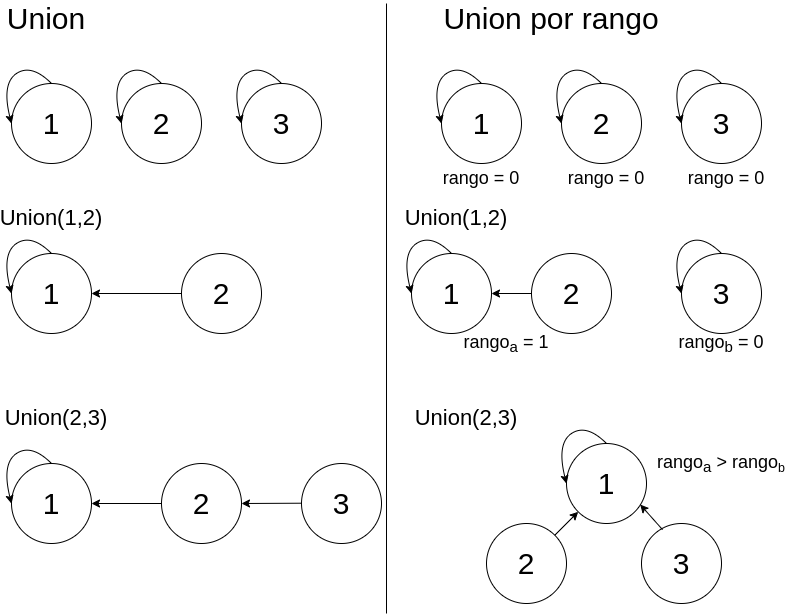

### 5.2. **Tiempo de ejecución del algoritmo de Kruskal con Union-Find**
Ahora que sabemos el tiempo de ejecución de las operaciones Union-Find y el porqué procederemos a ver el tiempo de ejecución del algoritmo de Kruskal usando el conjunto de datos Union-Find.

Por lo que volveremos al pseudocódigo de la parte 2

```
Función kruskalUnionFind (Grafo):
      
      T = ∅ 
      U = initialize(V)

      // Ordena los arcos de los nodos por coste usando un algoritmo de      
      // ordenamiento ej : MergeSort

      Para cada (v , w) ∈ E en orden creciente del coste:
          Si Find(U,v) != Find(U,w) entonces:
              T = T ∪ {(v,w)}
              Union(U, v, w)

      retorna T        
```
Tomando lo siguiente: $n$ los nodos y $m$ los arcos.

Vamos por partes:

+ Antes del loop tenemos lo siguiente:
>+ La función Initialize que ya vimos que es $O(n)$
>+ Ordenar los arcos tenemos que utilizar un algoritmo de ordenamiento como MergeSort u QuickSort tiene como complejidad $O(mlogn)$ esto es debido a que ordenaremos todos los arcos $m$ en una altura $n$ de nodos.

+ Dentro del loop hay $m$ iteraciones por lo que esto es $O(m)$:
>+ $2m$ veces Find tiene como complejidad $O(mlogn)$ esto es porque Find tiene complejidad $O(logn)$, pero esto se multiplica por la cantidad de iteraciones que son $2m$.
>+ ($n-1$) veces Union: Se tiene que hacer el arbol considerando los ($n-1$) nodos restantes y eso multiplicado con la complejidad de Union nos da la complejidad $O(nlogn)$.

Sumaremos todas las complejidades:

$$Complejidad = n + m + mlogn + mlogn + nlogn$$
$$Complejidad = n + m + 2mlogn + nlogn$$
$$Complejidad = n + m + logn(2m+n)$$

La parte de $logn(2m+n)$ es la función predominante, por lo que quitando el $2$ por ser constante tenemos la complejidad del algoritmo de Kruskal que es $O((m+n)logn)$.

Con $m$ los arcos del grafo de entrada y $n$ los nodos del grafo de entrada.

### 5.3 Memoria adicional usada en la implementación en python
En la implementacion ocupo dos arreglos adicionalesm, la primera guardaba la raices de cada nodo y la otra tenia el rango de cada nodo, esto con el objetivo de facilitar la implementacion de las operaciones Union y Find.

Ambos arreglo dependen de la cantiadd de nodos por lo que si tenemos $n$ como cantidad de nodos, la memoria adicional usada por estos dos arreglos es:

+ parents[  ] tendra $O(n)$

+ rango[  ] tendra $O(n)$

## 6. Experimentación

### 6.1 Kruskal a medida que los nodos aumentan

Veremos el comportamiento del algoritmo de Kruskal a medida que el grafo tenga cada vez mas nodos, en este caso la muestra tendra desde 5 nodos hasta 300.

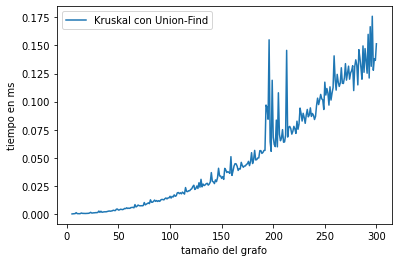

In [30]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

def graph_instance_creator(V):
  graph = []
  for i in range(V):
    for j in range(i+1, V):
      graph.append([i, j, random.randint(1, 500)])
  
  return graph

def kruskalCall(n, grafo):
    H = Grafardo(n)
    H.grafoEntrante(grafo)
    H.kruskalUnionFind()

x=[]; y=[]

for n in range(5,301):

  grafo = graph_instance_creator(n)
  
  t = repeat(setup="from __main__ import kruskalCall", stmt=f"kruskalCall({n},{grafo})", repeat=1, number=10)

  x.append(n)
  y.append(t)


plt.plot(x,y)
plt.legend(["Kruskal con Union-Find"])

plt.xlabel('tamaño del grafo')
plt.ylabel('tiempo en ms')
plt.show()

### Análisis del gráfico

Se ve una curva parecida a una cuadrática y tiene sus razones. Esto es debido a que el algoritmo de Kruskal hace el árbol recubridor recorriendo cada arco. Hay que ver el máximo de arcos que puede haber en un grafo:

+ Si hay $n$ nodos, entonces la máxima cantidad de arcos que puede haber es $(n(n-1))/2$ 

Entonces, como vimos en el punto 5 el tiempo de ejecución para el algoritmo Kruskal con Union-Find es de $O((m+n)logn)$ y si reemplazamos $m$ por el máximo posible de arcos posible tenemos:

+ $O(n^2logn)$

Por lo que podremos decir que el algoritmo de kruskal pierde efectividad si el grafo está muy denso en cuanto a arcos, haciendo que su tiempo de ejecución sea un poco peor que un tiempo de ejecución cuadrático.

## 6.2 Kruskal vs Prim
Dos algoritmos que resuelven el mismo problema, pero con ideas distintas, kruskal se fija más en el peso del arco y utilizar primero los de menor peso, mientras que Prim se fija más en los nodos y a través de ese nodo encontrar sus caminos cuyos arcos tengan menor peso.

En este experimento se tendrán desde 5 nodos hasta 50.


#### Algoritmo de Prim

In [72]:
from collections import defaultdict

class Edge:
    def __init__(self, val=None, a_vertex=None, b_vertex=None):
        self.weight = val
        self.a = a_vertex
        self.b = b_vertex

class EdgeMinHeap:
    def __init__(self):
        self.heap = []

    def heapify(self, index):
        minimum = index
        left = 2 * index + 1 # left(node) index
        right = 2 * index + 2 # right(node) index
        # value at left is minimum ?
        if left < len(self.heap) and self.heap[left].weight < self.heap[index].weight:
            minimum = left
        if right < len(self.heap) and self.heap[right].weight < self.heap[minimum].weight:
            minimum = right
        if minimum != index:
            self.interchange_vertex(index, minimum)

    def insert(self, edge):
        if len(self.heap) == 0:
            self.heap.append(edge)
        else:
            self.heap.append(edge)
            for i in range((len(self.heap)//2)-1, -1, -1):
                self.heapify(i)

    def delete(self):
        self.interchange_vertex(0, len(self.heap)-1) # Exchange 0th index with last index
        min_edge = self.heap.pop() # pop last element
        for i in range((len(self.heap)//2)-1, -1, -1):
            self.heapify(i)
        return min_edge

    def interchange_vertex(self, index_a, index_b):
        temp_val = self.heap[index_a].weight
        temp_a = self.heap[index_a].a
        temp_b = self.heap[index_a].b
        self.heap[index_a].weight = self.heap[index_b].weight
        self.heap[index_a].a = self.heap[index_b].a
        self.heap[index_a].b = self.heap[index_b].b
        self.heap[index_b].weight = temp_val
        self.heap[index_b].a = temp_a
        self.heap[index_b].b = temp_b


class Graph:
    def __init__(self, v_count):
        self.V = v_count
        self.graph = defaultdict(list)
        self.min_heap = EdgeMinHeap()

    def add_edge(self, u, v, weight):
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))

    def prims_mst_util(self, visited):
        min_edge = Edge()
        min_edge.weight = float('inf')
        for u in self.graph:
            for v, weight in self.graph[u]:
                if weight < min_edge.weight:
                    min_edge.weight = weight
                    min_edge.a = u
                    min_edge.b = v
        self.min_heap.insert(min_edge)
        edge_count = 0
        cost = 0
        while edge_count < self.V-1:
            new_edge = self.min_heap.delete() # get a min edge(which is connected and unvisited)
            cost += new_edge.weight # add its cost to overall cost
            edge_count += 1 # increase up the edge_count
            for u in [new_edge.a, new_edge.b]: # Iterate over the both ends of new_edge
                #if visited[u] == False or u == new_edge.a or u == new_edge.b:
                for v, weight in self.graph[u]: # Iterate over the adjacents for each end of new_edge
                    if visited[u] == False and visited[v] == False and v != new_edge.a and v != new_edge.b : # if adjacent edge is new/not_current_edge
                        self.min_heap.insert(Edge(weight, u, v)) # push it to heap
                        #visited[v] = True # Mark the adjacent visited to make it unavailable for other edges
            visited[new_edge.a] = True # mark first end of new_edge as visited
            visited[new_edge.b] = True # mark second end of new_edge as visited
        return cost

    def mst_cost(self):
        visited = [False]*self.V
        cost = self.prims_mst_util(visited)
        return cost

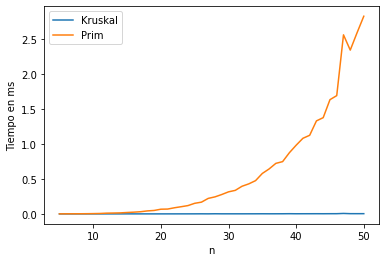

In [77]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

def primsCall(n, grafo):
    g = Graph(n)
    for i in grafo:
        g.add_edge(i[0],i[1],i[2])

    g.mst_cost()    

x=[]
y_Kruskal = []
y_Prim = []

for n in range(5,51):
  g = graph_instance_creator(n)

  t_Kruskal = repeat(setup="from __main__ import kruskalCall", stmt=f"kruskalCall({n},{g})", repeat=1, number=10)
  t_Prim = repeat(setup="from __main__ import primsCall", stmt=f"primsCall({n},{g})", repeat=1, number=10)

  x.append(n)
  y_Kruskal.append(t_Kruskal)
  y_Prim.append(t_Prim)


plt.plot(x,y_Kruskal)
plt.plot(x,y_Prim)

plt.legend(["Kruskal", "Prim"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### Análisis del gráfico
Como se ve en el gráfico, el comportamiento del algoritmo de Prim es cuadrática aunque más pronunciada, si bien en el experimento anterior dijimos que el algoritmo de kruskal dependía de la densidad de arcos que tenía el grafo, el algoritmo de Prim depende directamente de la cantidad de nodos. 

El algoritmo de Prim es más efectivo cuando el grafo es más denso porque para el caso cuando tenemos un grafo denso de $n$ nodos habrá casi $n^2$ arcos y ahí es cuando el algortimo de Prim es mucho más efectivo que el algoritmo de Kruskal.